Version para un único peon

introduzca el numero de jugadores3
[0, 0, 0, 0]
movimiento de peon 9corregir.  [14, 8]
movimiento de peon 9corregir.  [14, 8]
movimiento de peon 9corregir.  [14, 8]
movimiento de peon 9corregir.  [14, 8]
lista  [[2, 8]]
meta  [2, 8]
MEMORIA DEL PEON  10
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1]
[1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1]
[1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1]
[1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1]
[1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1]
[1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1]
[1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1]
[1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1]
[1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1]
[1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1]
[1, 1, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 1, 1]
[1, 1, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 1, 1]
[1, 1, 0, 0, 0, 0,

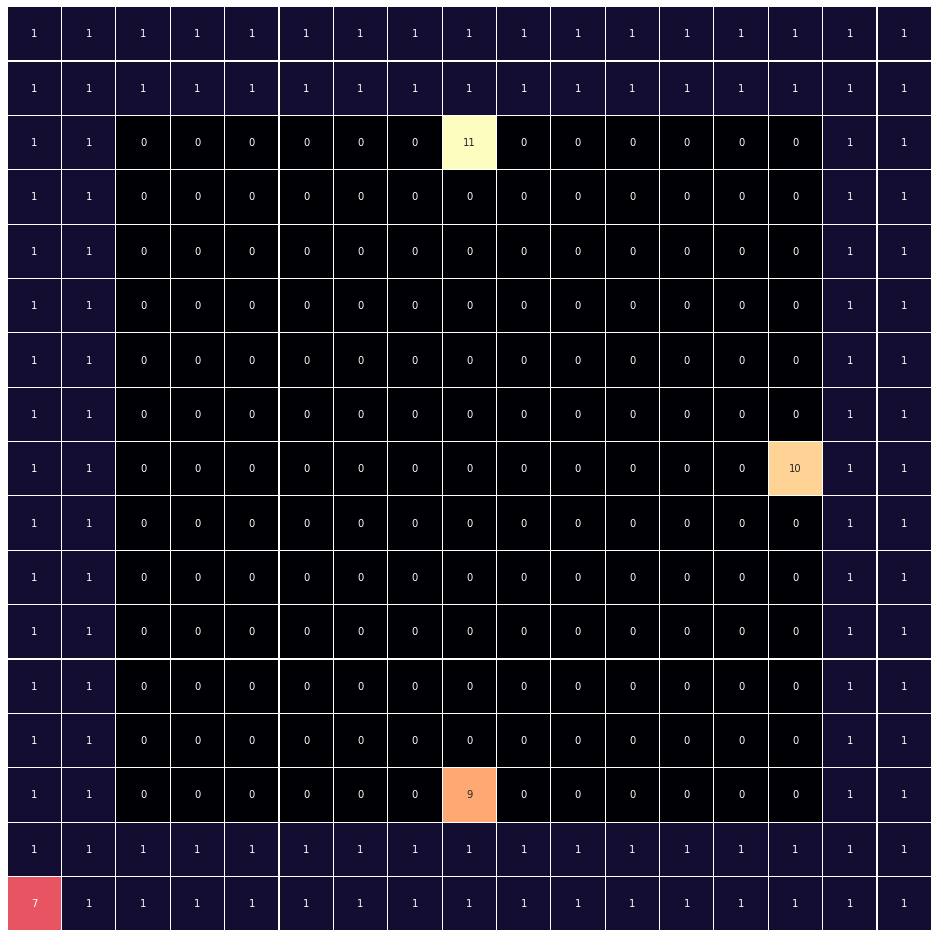

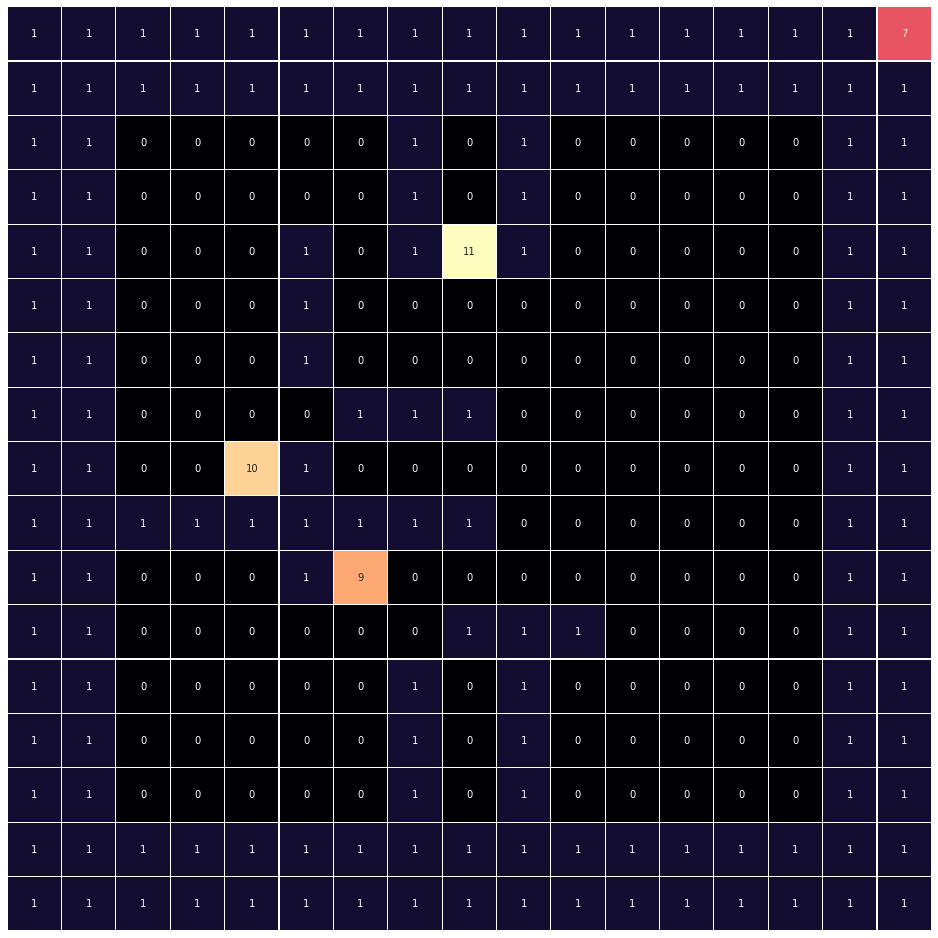

In [ ]:
import math
import random
import numpy as np
import seaborn as sns
from pylab import *
import time
import matplotlib.pyplot as plt
import random

def generarMatriz(n):
  matriz=np.ones(shape=(n,n)).astype(int)*0
  matriz[0:2,0:n]=1
  matriz[0:n,0:2]=1   
  matriz[n-2:n:,0:n]=1
  matriz[0:n,n-2:n]=1

  return matriz

def buscar(tablero,n):
  for i in range(len(tablero)):
    for j in range(len(tablero)):
      if tablero[i][j]==n:
        return [i,j]

def giro180(tablero):
  N=len(tablero)
  M=N//2
  aux=0
  for i in range(N):
    for j in range(M):
      aux = tablero[i][j]
      tablero[i][j] = tablero[i][N-j-1]
      tablero[i][N-j-1]=aux
  for i in range(M):
    for j in range(N):
      aux = tablero[i][j]
      tablero[i][j] = tablero[N-i-1][j]
      tablero[N-i-1][j]=aux

def rotar90(table):
  N=len(table)
  rotada = []
  for i in range(N):
    rotada.append([])
    for j in range(N):
      rotada[i].append(table[N-1-j][i])
  return rotada

def dibujarTablero(matriz, id=True):
    plt.figure(figsize=(np.size(matriz,0),np.size(matriz,1)))
    sns.heatmap(matriz, linewidths=.1, linecolor='white',
                annot=False, cmap='magma', yticklabels=False,
                xticklabels=False, cbar=False, square=True);
    sns.heatmap(matriz, linewidths=.1, linecolor='white',
                annot=id, cmap='magma', yticklabels=False,
                xticklabels=False, cbar=False, square=True,
                mask=np.array(matriz)<0);
    plt.ion()


class Peon:
  def __init__(self,tablero,x,y,d,paredes):
    self.PX=x
    self.PY=y
    self.ID=d
    self.tableroP = []
    self.jugadores = []
    self.NParedes=paredes

    for i in range(len(tablero)):
      self.tableroP.append([])
      for j in range(len(tablero)):
        self.tableroP[i].append(tablero[i][j])
  def getPX(self):
    return self.PX
  def getPY(self):
    return self.PY
  def getT(self):
    return self.tableroP
  def setPX(self,p):
    self.PX=p
  def setPY(self,p):
    self.PY=p
  def Act_jugadores(self,j):
    self.jugadores=j
  def getjugadores(self):
    return self.jugadores
  def marcarXY(self):
    self.tableroP[self.PX][self.PY]=self.ID


  def Act_tableroP(self,tablero):
    for i in range(len(tablero)):
      for j in range(len(tablero)):
        if tablero[i][j]==1:
          self.tableroP[i][j]=tablero[i][j]
  def getID(self):
    return self.ID


  def chequear(self,t,x,xf,y):
    for i in range(xf-x+1):
      if t[x+i][y]!=0:
        return False
    return True
  
  def obtener(self,t,i,j):
    a=j
    b=j
    while t[i][a]==1 and a<15:
      a+=1
    a-=1
    while t[i][b]==1 and b>1:
      b-=1
    b+=1
    return [b,a]

  def determinar_rectangulo(self,t,i,j):
    x=i
    y=j
    xf=i
    yf=j
    while t[x][y]==0:
      x-=1
    x+=1
    if x!=2:
      while t[xf][y]==0:
        xf+=1
      xf-=1
      pared=self.obtener(t,x-1,j)
      while self.chequear(t,x,xf,y-1) and y-1>=pared[0]:
        y-=1
      while self.chequear(t,x,xf,yf+1) and yf+1<=pared[1]:
        yf+=1
    return [x,y,xf,yf]
  
  def obtenerSalidadVerticales(self,t,x,xf,y,p,salida):
   for i in range(xf-x+1):
     if t[x+i][y+p]!=1:
       if t[x+i][y]!=1:
         salida.append([x+i,y])
  def obtenerSalidadHorizontales(self,t,y,yf,x,pared,salida):
    for i in range(yf-y+1):
      if t[pared][y+i]!=1:
        if t[x][y+i]!=1:#habia un == en vez de un !=
          salida.append([x,y+i])
          
  def decidir(self,tablero,sD,sI,sA,sB):
    lista = []
    posicion=[]
    for i in range(len(sD)):
      lista.append(sD[i])
    for i in range(len(sI)):
      lista.append(sI[i])
    for i in range(len(sA)):
      lista.append(sA[i])
    for i in range(len(sB)):
      lista.append(sB[i])
    print("lista ",lista)
    if lista!=[]:
      posicion=lista[0]
      for i in lista:
        if self.tableroP[posicion[0]][posicion[1]]>=self.tableroP[i[0]][i[1]] and i[0]%2==0 and i[1]%2==0:
          posicion=i
    return posicion
	
  def marcar(self,r,n):
    for i in range(r[2]-r[0]+1):
      for j in range(r[3]-r[1]+1):
        if self.tableroP[r[0]+i][r[1]+j]==0:
          self.tableroP[r[0]+i][r[1]+j]=n
  def esta(self,punto,r):
    return punto[0]<=r[2] and punto[0]<=r[0] and punto[1]<=r[3] and punto[0]<=r[1]
    
  def obtenerruta(self,tablero,listaAD):
    adx=listaAD[0][0]
    ady=listaAD[0][1]
    posx = self.PX
    posy = self.PY
    r=self.determinar_rectangulo(tablero,posx,posy)
    cen = False
    salidaD=[]
    salidaI=[]
    salidaA=[]
    salidaB=[]
    if r[0]-1==1:
      salidaA.append([2,posy])
    else:
      #print("ESTE ES EL RECTANGULO: ",r)
      self.obtenerSalidadVerticales(tablero,r[0],r[2],r[3]+2,-1,salidaD)
      self.obtenerSalidadVerticales(tablero,r[0],r[2],r[1]-2,1,salidaI)
      self.obtenerSalidadHorizontales(tablero,r[1],r[3],r[0]-2,r[0]-1,salidaA)
      self.obtenerSalidadHorizontales(tablero,r[1],r[3],r[2]+2,r[2]+1,salidaB)
    if salidaI == [] and salidaA == [] and salidaB==[]:
      self.marcar(r,3)
      cen = True
    if salidaI == [] and salidaA == [] and salidaD==[]:
      self.marcar(r,3)
      cen = True
    if salidaB == [] and salidaA == [] and salidaD==[]:
      self.marcar(r,3)
      cen = True
    if salidaI == [] and salidaB == [] and salidaD==[]:
      self.marcar(r,3)
      cen = True
    if cen==False:
      self.marcar(r,2)
    meta=self.decidir(tablero,salidaD,salidaI,salidaA,salidaB)
    print("meta ",meta)
    print("MEMORIA DEL PEON ",self.getID())
    for k in self.tableroP:
      print(k)

    ruta=[]
    if meta!=[]:
      if meta[0]==posx:
        if meta[1]>posy:
          if posx == adx and posy+2 == ady:
            if posy+4!=1:
              ruta=[posx,posy+4]
          else:
            ruta=[posx,posy+2]
        else:
          if posx == adx and posy-2 == ady:
            if posy-4!=1:
              ruta=[posx,posy-4]
          else:
            ruta=[posx,posy-2]
      else:
        if meta[1]==posy:
          if meta[0]>posx:
            if posx+2 == adx and posy == ady:
              if posx+4!=1:
                print("SALTEEEE")
                ruta=[posx+4,posy]
            else:
              ruta=[posx+2,posy]
          else:
            if posx-2 == adx and posy == ady:
              if posx-4!=1:
                print("SALTEEEE")
                ruta=[posx-4,posy]
            else:
              ruta=[posx-2,posy]
        else:
          if self.esta([posx,meta[1]],r):
            if meta[1]>posy:
              if posx == adx and posy+2 == ady:
                if posy+4!=1:
                  ruta=[posx,posy+4]
              else:
                ruta=[posx,posy+2]
            else:
              if posx == adx and posy-2 == ady:
                if posy-4!=1:
                  ruta=[posx,posy-4]
              else:
                ruta=[posx,posy-2]
          else:
            if meta[0]>posx:
              if posx+2 == adx and posy == ady:
                if posx+4!=1:
                  print("SALTEEEE")
                  ruta=[posx+4,posy]
              else:
                ruta=[posx+2,posy]
            else:
              if posx-2 == adx and posy == ady:
                if posx-4!=1:
                  print("SALTEEEE")
                  ruta=[posx-4,posy]
              else:
                ruta=[posx-2,posy]
    #self.tableroP[posx][posy]=self.ID
    return ruta
  
  def buscarPeon(self,listaAD):
    return listaAD[0]
  
  def HaySalida(self,tab,x,y):
    #for i in tab:
    #  print(i)
    #print()
    if x==1:
      #print("la X valeeeeeeee: ",x)
      return True
    else:
      if tab[x][y]==1 or tab[x][y]==-1:
        return False
      else:
        tab[x][y]=-1
        if self.HaySalida(tab,x-1,y):
          return True;
        if self.HaySalida(tab,x+1,y):
          return True;
        if self.HaySalida(tab,x,y-1):
          return True;
        if self.HaySalida(tab,x,y+1):
          return True;
        return False





  def crearcopia(self, tablero,x,y):
    tab = []
    for i in range(len(tablero)):
      tab.append([])
      for j in range(len(tablero)):
        tab[i].append(tablero[i][j])

    tab[x][y]=-1
    if self.HaySalida(tab,x-1,y):
      return True;
    if self.HaySalida(tab,x+1,y):
      return True;
    if self.HaySalida(tab,x,y-1):
      return True;
    if self.HaySalida(tab,x,y+1):
      return True;
    return False

  def ejecutarpared(self,tablero,posicion,x,y,x1,y1,x3,y3,a,b,c,d): 
    centinela=False
    jugadores = self.getjugadores()
    if tablero[posicion[x]+x1][posicion[y]+y1]==0 and tablero[posicion[x]+x3][posicion[y]+y3]==0:
      tablero[posicion[x]][posicion[y]]=1
      tablero[posicion[x]+a][posicion[y]+c]=1
      tablero[posicion[x]+b][posicion[y]+d]=1
      #centinela=True
      for j in jugadores:
        if j.getID()!=0:
          if self.crearcopia(tablero,j.getPX(),j.getPY()):
            centinela = True
          else:
            centinela = False
            break


      #if self.ID == self.jugadores[0][0]:
      #  if self.crearcopia(tablero,self.PX,self.PY):
      #    giro180(tablero)
      #    if self.crearcopia(tablero,self.jugadores[1][1],self.jugadores[1][2]):
      #      centinela=True
      #    else:
      #      centinela= False
      #    giro180(tablero)
      #  else:
      #    centinela=False
      #else:
      #  if self.crearcopia(tablero,self.PX,self.PY):
      #    giro180(tablero)
      #    if self.crearcopia(tablero,self.jugadores[0][1],self.jugadores[0][2]):
      #      centinela=True
      #    else:
      #      centinela= False
      #    giro180(tablero)
      #  else:
      #    centinela=False
      if centinela == False:#respuesta==False:
        tablero[posicion[x]][posicion[y]]=0
        tablero[posicion[x]+a][posicion[y]+c]=0
        tablero[posicion[x]+b][posicion[y]+d]=0

    return centinela#repuesta
      
  def ponerpared(self,tablero,listaAD):
    posicion = self.buscarPeon(listaAD)#busco la posicion del adversario
    #print("la posicion es ",posicion)
    posicion[0]=posicion[0]+1
    #print("la posicion actualizada ess ",posicion)
    #print(tablero)
    if self.NParedes==0:
      return self.obtenerruta(tablero,listaAD)
    #en el siguiente if estamos colocando una pared horizontal
    if tablero[posicion[0]][posicion[1]]==0:
      centinela=self.ejecutarpared(tablero,posicion,0,1,0,1,0,2,0,0,1,2)#lado derecho horizontal
      if centinela == False:
        centinela=self.ejecutarpared(tablero,posicion,0,1,0,-1,0,-2,0,0,-1,-2)#lado izquierdo horizontal
        if centinela==False:
          return self.obtenerruta(tablero,listaAD)#no se pudo me muev
    else:
      #ahora vamos a intentar colocar una pared vertical
      posicion[0] = posicion[0] -1
      posicion[1] = posicion[1] + 1 # como intento para poner una pared del lado derecho
      if tablero[posicion[0]][posicion[1]]==0:
        centinela=self.ejecutarpared(tablero,posicion,0,1,1,0,2,0,1,2,0,0)#lado derecho vertical
        if centinela == False:
          centinela=self.ejecutarpared(tablero,posicion,0,1,-1,0,-2,0,-1,-2,0,0)#lado izquierda vertical
          if centinela==False:
            return self.obtenerruta(tablero,listaAD)#no se pudo me muev
      else:
        posicion[1] = posicion[1] - 2
        if tablero[posicion[0]][posicion[1]]==0:
          centinela=self.ejecutarpared(tablero,posicion,0,1,1,0,2,0,1,2,0,0)#lado derecho vertical
          if centinela == False:
            centinela=self.ejecutarpared(tablero,posicion,0,1,-1,0,-2,0,-1,-2,0,0)#lado izquierda vertical
            if centinela==False:
              return self.obtenerruta(tablero,listaAD)#no se pudo me mue
    self.NParedes=self.NParedes-1
    return [self.getPX(),self.getPY()]


  def pensamiento(self,tablero,listaAD):
    posx = self.getPX()
    posy = self.getPY()
    if random.randrange(10)<5:
      return self.obtenerruta(tablero,listaAD)
    else:
      return self.ponerpared(tablero,listaAD)

 
    


def ActualizarTablero(tablero,peon):
  peon.Act_tableroP(tablero)
  
def Turno(peon,tablero):
  if peon.getID()==0:
    return True
  #ELEGIR EL ADVERSARIO
  jugadores = peon.getjugadores()
  if peon.getID()==jugadores[0].getID():
    ADVERSARIO = [jugadores[1].getPX(),jugadores[1].getPY()]
  else:
    ADVERSARIO = [jugadores[0].getPX(),jugadores[0].getPY()]

  #intencion=peon.obtenerruta(tablero,[ADVERSARIO])
  intencion=peon.pensamiento(tablero,[ADVERSARIO])
  ActualizarTablero(tablero,peon)
    
  print("movimiento de peon 9corregir. ",intencion)
  if intencion==[]:
    return False

  peon.setPX(intencion[0])
  peon.setPY(intencion[1])
  peon.marcarXY()
  if intencion[0]-1==1:
    return False
  return True

#MAIN()
def inicio():
  #tablero = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
	#	[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
	#	[1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1],
	#	[1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1],
	#	[1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1],
	#	[1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1],
	#	[1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1],
	#	[1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1],
	#	[1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1],
	#	[1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1],
	#	[1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1],
	#	[1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1],
	#	[1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1],
	#	[1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1],
	#	[1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1],
	#	[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
	#	[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]
  tablero = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
		[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
		[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
		[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
		[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
		[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
		[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
		[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
		[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
		[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
		[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
		[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
		[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
		[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
		[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
		[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
		[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]
  print(tablero)
  posx=14
  posy=8
  posx2=14
  posy2=8
  centinela = True
  intencion = []
#creamos peon 9
  peon = Peon(tablero,posx,posy,9,7)
  giro180(tablero)
  peonA = Peon(tablero,posx,posy,10,7)
  giro180(tablero)

  aux=tablero[peon.getPX()][peon.getPY()]
  tablero[peon.getPX()][peon.getPY()] = peon.getID()
  
  giro180(tablero)
  aux2=tablero[peonA.getPX()][peonA.getPY()]
  tablero[peonA.getPX()][peonA.getPY()] = peonA.getID()
  giro180(tablero)
  
  dibujarTablero(tablero)
  tablero[peon.getPX()][peon.getPY()] = aux
  giro180(tablero)
  tablero[peonA.getPX()][peonA.getPY()] = aux2
  giro180(tablero)
  
  
#verificar si esto se necesita????
  juga = [peon,peonA]#[[peon.getID(),peon.getPX(), peon.getPY()],[peonA.getID(),peonA.getPX(), peonA.getPY()]]
  peon.Act_jugadores(juga)
  peonA.Act_jugadores(juga)
  while True:
    if not Turno(peon,tablero):
      break
    giro180(tablero)
    if not Turno(peonA,tablero):
      break
    giro180(tablero)

  giro180(tablero)

  aux=tablero[peon.getPX()][peon.getPY()]
  tablero[peon.getPX()][peon.getPY()] = 9
  
  giro180(tablero)
  aux2=tablero[peonA.getPX()][peonA.getPY()]
  tablero[peonA.getPX()][peonA.getPY()] = peonA.getID()
  giro180(tablero)
  dibujarTablero(tablero)


def inicio2(n):
  tablero = [[7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
		[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
		[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
		[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
		[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
		[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
		[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
		[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
		[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
		[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
		[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
		[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
		[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
		[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
		[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
		[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
		[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]
  posx=14
  posy=8
  JUG =[]
  nombre = 9
  for i in range(n):
    JUG.append(Peon(tablero,posx,posy,nombre+i,7))
    tablero = rotar90(tablero)
  while n<4:
    JUG.append(Peon(tablero,posx,posy,0,7))
    n+=1


  
  centinela = True
  intencion = []

  aux=[0,0,0,0]
  for i in range(4):
    if JUG[i].getID()!=0:
      aux[i]=tablero[JUG[i].getPX()][JUG[i].getPY()]
      tablero[JUG[i].getPX()][JUG[i].getPY()] = JUG[i].getID()
    tablero= rotar90(tablero)
  print(aux)

  dibujarTablero(tablero)

  for i in range(4):
    if JUG[i].getID()!=0:
      tablero[JUG[i].getPX()][JUG[i].getPY()] = aux[i]  
    tablero = rotar90(tablero)

  for i in range(n):
    JUG[i].Act_jugadores(JUG)

  cent = True
  while True:
    for i in range(4):
      if not Turno(JUG[i],tablero):
        cent = False
        break
      tablero = rotar90(tablero)
    if cent == False:
      break

  aux=[0,0,0,0]
  
  for i in range(4):
    print("posicion",JUG[i].getID()," ",JUG[i].getPX()," ",JUG[i].getPY())
    aux[i]=tablero[JUG[i].getPX()][JUG[i].getPY()]
    tablero[JUG[i].getPX()][JUG[i].getPY()] = JUG[i].getID()
    tablero= rotar90(tablero)
  print(aux)

  dibujarTablero(tablero)





  
#inicio()
n = int (input ("introduzca el numero de jugadores"))
inicio2(n)

